<a href="https://colab.research.google.com/github/ravi-0309/Dynamic-Response/blob/main/Numerical_Methods_to_Solve_Dynamic_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

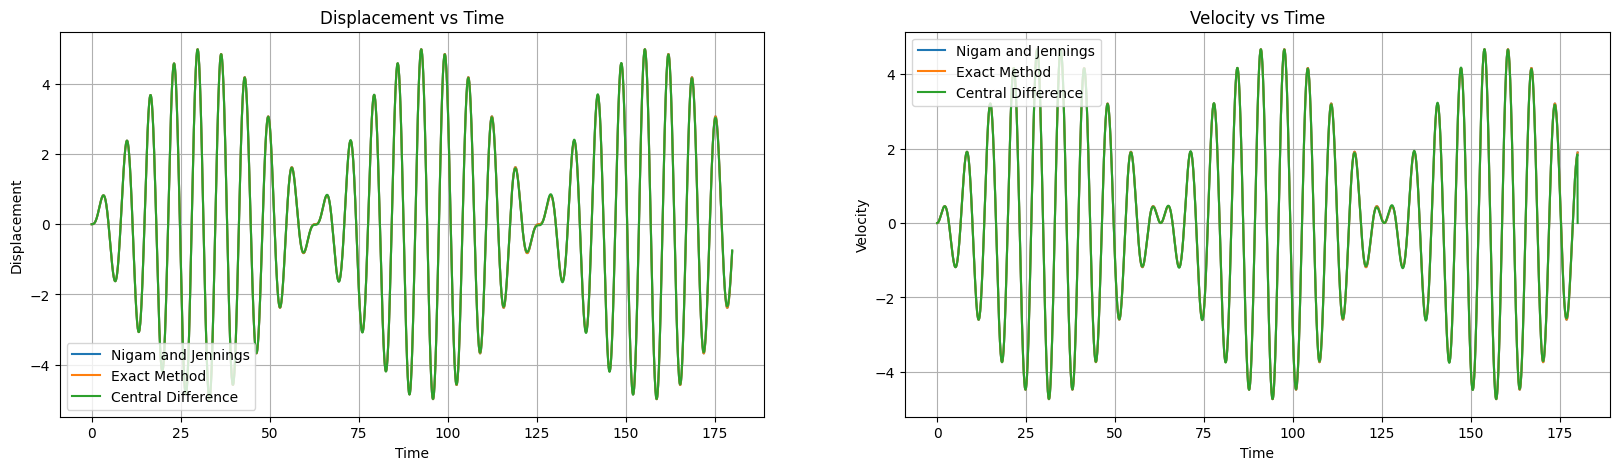

Mean Squared Error for Nigam and Jennings in Displacement:  1.8597540927782882e-07
Mean Squared Error for Nigam and Jennings in Velocity:  1.662736209066739e-07
Mean Squared Error for Central Difference in Displacement:  0.0003380604952083414
Mean Squared Error for Central Difference in Velocity:  0.001333274420140368


In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Input Parameters
m = 1.0
c = 0.0
k = 1.0

# Time Values
dt = 0.05 # Time-Step
time = np.arange(0, 180, dt)

# Initial Conditions
x_i = 0.0
x_i_dot = 0.0

# Forcing Function
F_0 = 0.5
ω = 0.9
F_t = F_0 * np.sin(ω * time)

# Function to Calculate Dynamic Response by Nigam and Jennings Method
def nigam_jennings(ax0, ax1, m, c, k, time, x_i, x_i_dot):
  ω_n = np.sqrt(k/m)
  xi = c/(2*m*ω_n)
  ω_d = ω_n * np.sqrt(1 - xi**2)
  A = np.exp(-xi * ω_n * dt) * ((xi/np.sqrt(1-xi**2)) * np.sin(ω_d * dt) + np.cos(ω_d*dt))
  B = np.exp(-xi * ω_n * dt) * np.sin(ω_d * dt) / (ω_n * np.sqrt(1-xi**2))
  C = (1/k) * ((2*xi/(ω_n*dt)) + np.exp(-xi * ω_n * dt) * ((((1-2*xi**2)/(ω_d*dt)) - (xi/np.sqrt(1-xi**2))) * np.sin(ω_d * dt) - (1 + (2 * xi / (ω_n * dt))) * np.cos(ω_d * dt)))
  D = (1/k) * (1 - (2*xi/(ω_n*dt)) + np.exp(-xi * ω_n * dt) * (((2*xi*xi - 1) / (ω_d*dt)) * np.sin(ω_d*dt) + (2*xi/(ω_n*dt)) * np.cos(ω_d*dt)))
  A_prime = -1 * np.exp(-xi * ω_n * dt) * ω_n * np.sin(ω_d * dt) / (np.sqrt(1-xi**2))
  B_prime = np.exp(-xi * ω_n * dt) * (np.cos(ω_d*dt) - (xi/np.sqrt(1-xi**2)) * np.sin(ω_d * dt))
  C_prime = (1/k) * ((-1/dt) + np.exp(-xi * ω_n * dt) * (((ω_n/np.sqrt(1-xi**2)) + (xi/(dt*np.sqrt(1-xi**2)))) * np.sin(ω_d * dt) + (1/dt) * np.cos(ω_d * dt)))
  D_prime = (1-A) / (k*dt)

  # Empty Arrays
  x_nigam_jennings = [x_i]
  x_dot_nigam_jennings = [x_i_dot]

  # Loop to get values of Displaceemnt and Velocities
  for i in range(len(time) - 1):
    x_i_next = A * x_i + B * x_i_dot + C * F_t[i] + D * F_t[i+1]
    x_i_dot_next = A_prime * x_i + B_prime * x_i_dot + C_prime * F_t[i] + D_prime * F_t[i+1]
    x_i = x_i_next
    x_i_dot = x_i_dot_next
    x_nigam_jennings.append(x_i_next)
    x_dot_nigam_jennings.append(x_i_dot_next)

  # Plotiing Curves
  ax0.plot(time, x_nigam_jennings, label = 'Nigam and Jennings')
  ax1.plot(time, x_dot_nigam_jennings, label = 'Nigam and Jennings')

  # Output Displacement and Velocity values
  return x_nigam_jennings, x_dot_nigam_jennings

# Function to Calculate Dynamic Response by Analytical Method
def exact_method(ax0, ax1, m, c, k, time, x_i, x_i_dot):
  ω_n = np.sqrt(k/m) # natural Frequency
  c_critical = 2 * np.sqrt(m * k)  # Critical Damping
  xi = c/c_critical # Damping Ratio
  ω_d = ω_n * np.sqrt(1 - xi**2)  # Damped Frequency
  r = ω / ω_n  # Frequency Ratio
  u_static = F_0 / k  # Static Displacement
  Rd = 1 / np.sqrt((1 - r**2)**2 + (2 * r * xi)**2)  # Damped Response
  theta = np.arctan((2 * r * xi) / (1 - r**2))  # Phase Difference
  A = x_i + Rd * u_static * np.sin(theta)
  B = x_i_dot - Rd * u_static * ω * np.cos(theta) + A * ω * xi

  # Displacement and Velocity Functions
  x_exact = np.exp(-xi * ω_n * time) * (A * np.cos(ω_d * time) + B * np.sin(ω_d * time)) + Rd * u_static * np.sin(ω*time - theta)
  x_dot_exact = np.exp(-xi * ω_n * time) * ((B * ω_d - xi * ω_n * A) * np.cos(ω_d * time) + (-A * ω_d - xi * ω_n * B) * np.sin(ω_d * time)) + Rd * u_static * ω * np.cos(ω*time - theta)

  # Plotiing Curves
  ax0.plot(time, x_exact, label = 'Exact Method')
  ax1.plot(time, x_dot_exact, label = 'Exact Method')

  # Output Displacement and Velocity values
  return x_exact, x_dot_exact

# Function to Calculate Dynamic Response by Central Difference Method
def central_difference(ax0, ax1, m, c, k, time, x_i, x_i_dot):
  A = (m/dt**2) + (c*0.5/dt)
  B = (m/dt**2) - (c*0.5/dt)
  C = k - 2*m/dt**2

  # Empty Arrays
  x_central_difference = [x_i]
  x_dot_central_difference = [x_i_dot]

  x_i_double_dot = (F_t[0] - c*x_i_dot - k*x_i) / m
  x_i_minus_one = x_i - dt*x_i_dot + 0.5*x_i_double_dot*dt**2

  for i in range(len(time) - 1):
    x_i_next = (F_t[i] / A) - (x_i_minus_one * B/A) - (x_i * C / A)
    x_i_minus_one = x_i
    x_i = x_i_next
    x_central_difference.append(x_i_next)
    if i != 0:
      x_dot_central_difference.append((x_central_difference[i+1] - x_central_difference[i-1])/(2*dt))
  x_dot_central_difference.append(0)

  ax0.plot(time, x_central_difference, label = 'Central Difference')
  ax1.plot(time, x_dot_central_difference, label = 'Central Difference')

  return x_central_difference, x_dot_central_difference

# Plotting Displacements
fig, ax = plt.subplots(1, 2, figsize = (20,5))
ax[0].set_title('Displacement vs Time')
ax[0].grid()
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Displacement')
ax[1].set_title('Velocity vs Time')
ax[1].grid()
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Velocity')
x_nigam_jennings, x_dot_nigam_jennings = nigam_jennings(ax[0], ax[1], m, c, k, time, x_i, x_i_dot)
x_exact, x_dot_exact = exact_method(ax[0], ax[1], m, c, k, time, x_i, x_i_dot)
x_central_difference, x_dot_central_difference = central_difference(ax[0], ax[1], m, c, k, time, x_i, x_i_dot)
ax[0].legend()
ax[1].legend()
plt.show()

# Calculating and Plotting Mean Squared Error
x_mse_nigam_jennings = np.mean((np.array(x_exact) - np.array(x_nigam_jennings))**2)
x_dot_mse_nigam_jennings = np.mean((np.array(x_dot_exact) - np.array(x_dot_nigam_jennings))**2)
x_mse_central_difference = np.mean((np.array(x_exact) - np.array(x_central_difference))**2)
x_dot_mse_central_difference = np.mean((np.array(x_dot_exact) - np.array(x_dot_central_difference))**2)
print('Mean Squared Error for Nigam and Jennings in Displacement: ', x_mse_nigam_jennings)
print('Mean Squared Error for Nigam and Jennings in Velocity: ', x_dot_mse_nigam_jennings)
print('Mean Squared Error for Central Difference in Displacement: ', x_mse_central_difference)
print('Mean Squared Error for Central Difference in Velocity: ', x_dot_mse_central_difference)